<ipython-input-3-e3cee4b3b148>:6: RuntimeWarning: invalid value encountered in sqrt
  Y_lim_v=np.sqrt(-(X_lim-1)**2 +2) + 1
<ipython-input-3-e3cee4b3b148>:7: RuntimeWarning: invalid value encountered in sqrt
  Y_lim_n=-(np.sqrt(-(X_lim-1)**2 +2)) + 1


Точка начала комп. прямой:( 0.0000 , 2.0000 )
Точка конца комп. прямой: ( 4.0000 , -1.3333 )


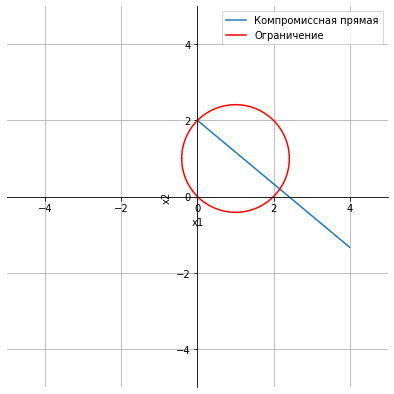

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

X_lim=np.linspace(-0.5,2.5,10000)
Y_lim_v=np.sqrt(-(X_lim-1)**2 +2) + 1    
Y_lim_n=-(np.sqrt(-(X_lim-1)**2 +2)) + 1

#Исходные данные
def F1(x1,x2):
    return -3*(x1)**2 - 2*(x2-2)**2
def F2(x1,x2):
    return -(x1-4)**2 - (3*x2+4)**2
def lim(x1,x2):
    return -(x1-1)**2-(x2-1)**2 + 2

#Подсчет координат компромиссной прямой
xc=[0,0]
yc=[0,0]
fun = lambda x: max([-F1(x[0],x[1])])
res = minimize(fun, np.array([0, 0]), method='SLSQP')
xc[0]=res.x[0]
yc[0]=res.x[1]

fun = lambda x : max ([-F2(x[0],x[1])])
res = minimize(fun, np.array([0, 0]), method='SLSQP')
xc[1]=res.x[0]
yc[1]=res.x[1]

print('Точка начала комп. прямой:(',"%.4f" % (xc[0]),',',"%.4f" % (yc[0]),')')
print('Точка конца комп. прямой: (',"%.4f" % (xc[1]),',',"%.4f" % (yc[1]),')')


#Графическое представление ограничения и компромиссной прямой
fig,ax= plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.spines["left"].set_position("center")
ax.spines["bottom"].set_position("center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_aspect("equal")

fig.set_figwidth(9)
fig.set_figheight(7)

ax.plot(xc,yc, label="Компромиссная прямая")
ax.plot(X_lim,Y_lim_v, label="Ограничение", color='red')
ax.plot(X_lim,Y_lim_n, color='red')

ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax.grid()
ax.legend()
plt.show()

Lam       x1       x2
  0   1.4008  -0.3562
0.1   1.3645  -0.3664
0.2   1.3159  -0.3785
0.3   1.2486  -0.3922
0.4   1.1503  -0.4062
0.5   1.0000  -0.4142
0.6   0.7658  -0.3947
0.7   0.5000  -0.1951
0.8   0.3077   0.2353
0.9   0.1429   0.8889
  1   0.0000   2.0000


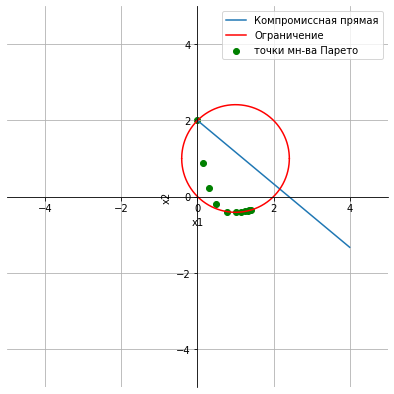

In [5]:
lam = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

#Теорема Карлина
X_1 =[]
X_2 =[]

np.array(X_1)
np.array(X_2)

print("%3s%9s%9s" %('Lam','x1','x2'))
for i in range(len(lam)):
    fun = lambda x: -(lam[i]*F1(x[0],x[1])+(1-lam[i])*F2(x[0],x[1]))
    cons = ({'type': 'ineq', 'fun': lambda x:  lim(x[0],x[1])})
    res = minimize(fun, np.array([0, 0]), method='SLSQP',constraints=cons)
    X_1.append(res.x[0])
    X_2.append(res.x[1])
    print("%3s%9s%9s" %(lam[i],"%.4f" % (res.x[0]),"%.4f" % (res.x[1])))


fig,ax= plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.spines["left"].set_position("center")
ax.spines["bottom"].set_position("center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_aspect("equal")

fig.set_figwidth(9)
fig.set_figheight(7)

ax.plot(xc,yc, label="Компромиссная прямая")
ax.plot(X_lim,Y_lim_v, label="Ограничение", color='red')
ax.plot(X_lim,Y_lim_n, color='red')
ax.scatter(X_1, X_2, color ='green' , label="точки мн-ва Парето")

ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax.grid()
ax.legend()
  
plt.show() 

Lam       x1       x2
  0   1.4008  -0.3562
0.1   1.4008  -0.3562
0.2   1.4008  -0.3562
0.3   1.4009  -0.3562
0.4   1.4008  -0.3562
0.5   1.1825  -0.4024
0.6   0.6903  -0.3799
0.7   0.4947  -0.1889
0.8   0.0000  -0.0000
0.9   0.2347   0.4720
  1   0.0000   2.0000


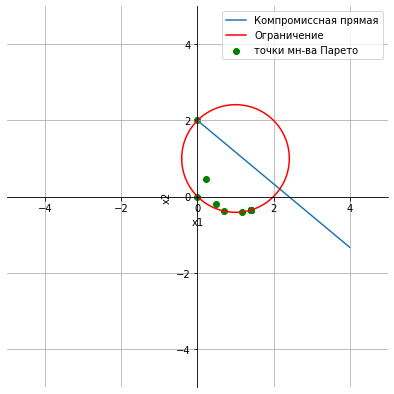

In [6]:
#Теорема Гермейера
X1 =[]
X2 =[]

np.array(X1)
np.array(X2)

print("%3s%9s%9s" %('Lam','x1','x2'))
for i in range(len(lam)):
    fun = lambda x: max([-(lam[i]*F1(x[0],x[1])),-((1-lam[i])*F2(x[0],x[1]))])
    cons = ({'type': 'ineq', 'fun': lambda x:  lim(x[0],x[1])})
    res = minimize(fun, np.array([0, 0]), method='SLSQP',constraints=cons)
    X1.append(res.x[0])
    X2.append(res.x[1])
    print("%3s%9s%9s" %(lam[i],"%.4f" % (res.x[0]),"%.4f" % (res.x[1])))


fig,ax= plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.spines["left"].set_position("center")
ax.spines["bottom"].set_position("center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_aspect("equal")

fig.set_figwidth(9)
fig.set_figheight(7)

ax.plot(xc,yc, label="Компромиссная прямая")
ax.plot(X_lim,Y_lim_v, label="Ограничение", color='red')
ax.plot(X_lim,Y_lim_n, color='red')
ax.scatter(X1, X2, color ='green' , label="точки мн-ва Парето")

ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax.grid()
ax.legend()
  
plt.show() 

  i       x1       x2
  0  -0.0000   0.5148
  1  -0.0000   0.2359
  2   0.0046  -0.0045
  3   0.2487  -0.1981
  4   0.5184  -0.3297
  5   0.8055  -0.4008
  6   1.1057  -0.4103
  7   1.4201  -0.3504
  8   1.7606  -0.1922
  9   2.2812   0.4012


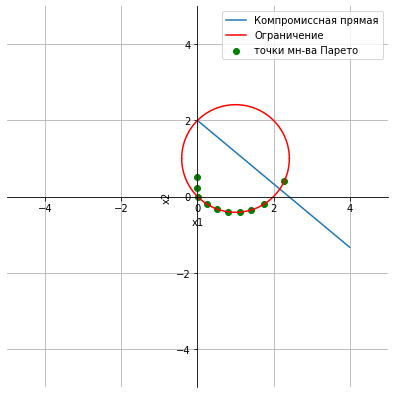

In [11]:
#Прямой перебор
_X1 =[]
_X2 =[]

np.array(_X1)
np.array(_X2)

#Находим макс. значения x для F1 и F2
fun1 = lambda x: max([F1(x[0],x[1])])
cons = ({'type': 'ineq', 'fun': lambda x:  lim(x[0],x[1])})
res1 = minimize(fun1, np.array([0, 0]), method='SLSQP',constraints=cons)

fun2 = lambda x : max ([F2(x[0],x[1])])
res2 = minimize(fun2, np.array([0, 0]), method='SLSQP',constraints=cons)

#F1
f1 =F1(res1.x[0],res1.x[1])
#x из F2 -> F1
f1_2 =F1(res2.x[0],res2.x[1])
#A=abs (f1 -f1_2)/10
A = abs(f1-f1_2)/10

print("%3s%9s%9s" %('i','x1','x2'))
for i in range(10):
    fun = lambda x: max([F1(x[0],x[1])])
    cons = ({'type': 'ineq', 'fun': lambda x:  lim(x[0],x[1])},
            {'type': 'ineq', 'fun': lambda x: F1(x[0],x[1])-f1_2 + A},
            {'type': 'ineq', 'fun': lambda x: F1(x[0],x[1])-f1})
    res = minimize(fun, np.array([0, 0]), method='SLSQP',constraints=cons)
    _X1.append(res.x[0])
    _X2.append(res.x[1])
    f1_2 = F1(res.x[0],res.x[1])
    print("%3s%9s%9s" %(i,"%.4f" % (res.x[0]),"%.4f" % (res.x[1])))
    
fig,ax= plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.spines["left"].set_position("center")
ax.spines["bottom"].set_position("center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_aspect("equal")

fig.set_figwidth(9)
fig.set_figheight(7)

ax.plot(xc,yc, label="Компромиссная прямая")
ax.plot(X_lim,Y_lim_v, label="Ограничение", color='red')
ax.plot(X_lim,Y_lim_n, color='red')
ax.scatter(_X1, _X2, color ='green' , label="точки мн-ва Парето")

ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax.grid()
ax.legend()
  
plt.show() 